# Customer Segmentation

Splitting customers into groups based on common features allows a company to effectively market to and retain each group. There are numerous ways in which customers can be segmented but common bases include:
- Demographics
- Geographic
- Pyschographics
- Behavioral
- Contextual/Situational
Customers can also be grouped by a combination of the above or through automation like k-means clustering. With any method, the objective is always the same - group like with like so that you can better manage your customer base.

In the dataset below, we'll see two methods for customer segmentation so that we can understand the value of bucketing customers based on key characteristics.

# Initial Setup and Exploration

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [16]:
url = 'https://raw.githubusercontent.com/bundickm/\
Sales-and-Segmentation-Analysis-and-Dashboard/\
master/assets/sales_data_sample.csv'
df = pd.read_csv(url, encoding='unicode_escape')
df.shape

(2823, 25)

In [17]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [19]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


# RFM Analysis

A simple yet effective way of segmenting customers is through RFM Analysis. RFM uses just three factors to segment customers: Recency, Frequency, and Monetary.

- Recency: How much time since the customer performed a desired activity (usually a purchase)? The more recently the customer has interacted with the company, the more likely they will be responsive to communication
- Frequency: How often does the customer perform the desired activity? Customers that frequently interact with the company are generally of higher value than those that make a single purchase or those with sporatic activity.
- Monetary: How much has the customer spent in a given period of time.

RFM analysis may seem a bit simplistic but it is precisely because it is simple and intuitive that it is so popular.

In [20]:
rfm_df = df[['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']]
rfm_df['ORDERDATE'] = pd.to_datetime(rfm_df['ORDERDATE'])
print('Shape:', rfm_df.shape)
rfm_df.head()

Shape: (2823, 4)


,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2003-02-24,2871.00
1,Reims Collectables,10121,2003-05-07,2765.90
2,Lyon Souveniers,10134,2003-07-01,3884.34
3,Toys4GrownUps.com,10145,2003-08-25,3746.70
4,Corporate Gift Ideas Co.,10159,2003-10-10,5205.27


In [21]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CUSTOMERNAME  2823 non-null   object        
 1   ORDERNUMBER   2823 non-null   int64         
 2   ORDERDATE     2823 non-null   datetime64[ns]
 3   SALES         2823 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 88.3+ KB


First we'll simplify the dataset down to the key features we need for RFM and then apply simple manipulations to assign each customer a value for recency, frequency, and monetary value.

In [22]:
NOW = rfm_df['ORDERDATE'].max()

In [23]:
rfm_table = rfm_df.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (NOW - x.max()).days,
                                                'ORDERNUMBER': lambda x: len(x.unique()),
                                                'SALES': lambda x: x.sum()})

rfm_table = rfm_table.rename(columns={'ORDERDATE': 'recency', 
                                      'ORDERNUMBER': 'frequency',
                                      'SALES': 'monetary_value'})

In [24]:
rfm_table.head()

,recency,frequency,monetary_value
CUSTOMERNAME,,,
"AV Stores, Co.",195,3,157807.81
Alpha Cognac,64,3,70488.44
Amica Models & Co.,264,2,94117.26
"Anna's Decorations, Ltd",83,4,153996.13
Atelier graphique,187,3,24179.96


Next we will add three new features by separating the RFM features into quantiles. This will allow us to quickly sort the customers into different groups as we will see below and gives us 64 distinct customer segments (4x4x4).

In [25]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75]).to_dict()
quantiles

{'frequency': {0.25: 2.0, 0.5: 3.0, 0.75: 3.0},
 'monetary_value': {0.25: 70129.4325, 0.5: 86522.61, 0.75: 120575.875},
 'recency': {0.25: 80.25, 0.5: 185.0, 0.75: 229.25}}

In [26]:
def R_Class(value, category, quartile_dict):
    if value <= quartile_dict[category][0.25]:
        return 1
    elif value <= quartile_dict[category][0.50]:
        return 2
    elif value <= quartile_dict[category][0.75]: 
        return 3
    else:
        return 4
    

def FM_Class(value, category, quartile_dict):
    if value <= quartile_dict[category][0.25]:
        return 4
    elif value <= quartile_dict[category][0.50]:
        return 3
    elif value <= quartile_dict[category][0.75]: 
        return 2
    else:
        return 1

In [27]:
rfm_table['R_Quartile'] = rfm_table['recency'].apply(R_Class,
                                            args=('recency', quantiles,))
rfm_table['F_Quartile'] = rfm_table['frequency'].apply(FM_Class,
                                            args=('frequency', quantiles,))
rfm_table['M_Quartile'] = rfm_table['monetary_value'].apply(FM_Class,
                                            args=('monetary_value', quantiles,))

rfm_table.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile
CUSTOMERNAME,,,,,,
"AV Stores, Co.",195,3,157807.81,3,3,1
Alpha Cognac,64,3,70488.44,1,3,3
Amica Models & Co.,264,2,94117.26,4,4,2
"Anna's Decorations, Ltd",83,4,153996.13,2,1,1
Atelier graphique,187,3,24179.96,3,3,4


We can use the quantile features to apply a customer score or grade if we would like to simplify the segmentation further or have larger segments for certain outreach.

In [28]:
rfm_table['RFM_score'] = rfm_table[['R_Quartile', 'F_Quartile',
                                    'M_Quartile']].sum(axis=1)

In [29]:
def rfm_customer_grade(score):
  if score <= 4:
    return 'A'
  elif score <= 7:
    return 'B'
  elif score <= 10:
    return 'C'
  else:
    return 'D'

rfm_table['customer_grade'] = rfm_table['RFM_score'].apply(rfm_customer_grade)
rfm_table.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_score,customer_grade
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",195,3,157807.81,3,3,1,7,B
Alpha Cognac,64,3,70488.44,1,3,3,7,B
Amica Models & Co.,264,2,94117.26,4,4,2,10,C
"Anna's Decorations, Ltd",83,4,153996.13,2,1,1,4,A
Atelier graphique,187,3,24179.96,3,3,4,10,C


## Customer Segments

After segmenting with RFM the next step is to select different groups of customers so that you can send out targeted communication. With RFM Analysis we can quickly see our most valuable customers, those on the verge of churn, customers we have lost and more. And thanks to the simplicity of the segmentation, it is easy for any employee to quickly understand the group and take action.

In [30]:
# Function to make group selection easier
def RFM_segment(recency=None, frequency=None, monetary=None):
  condition = None
  
  if recency is not None:
    r_condition = rfm_table['R_Quartile'] == recency
    condition = r_condition
  if frequency is not None:
    f_condition = rfm_table['F_Quartile'] == frequency
    if condition is not None:
      condition = condition & f_condition
    else:
      condition = f_condition
  if monetary is not None:
    m_condition = rfm_table['M_Quartile'] == monetary
    if condition is not None:
      condition = condition & m_condition
    else:
      condition = m_condition
  
  return condition

In [31]:
# Best Customers
rfm_table[RFM_segment(1,1,1)].sort_values('monetary_value',
                                          ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_score,customer_grade
CUSTOMERNAME,,,,,,,,
Euro Shopping Channel,0,26,912294.11,1,1,1,3,A
Mini Gifts Distributors Ltd.,2,17,654858.06,1,1,1,3,A
La Rochelle Gifts,0,4,180124.90,1,1,1,3,A
The Sharp Gifts Warehouse,39,4,160010.27,1,1,1,3,A
Souveniers And Things Co.,2,4,151570.98,1,1,1,3,A


In [32]:
# Customers on Verge of Churn
rfm_table[rfm_table['R_Quartile'] >= 3].sort_values('monetary_value', 
                                                    ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_score,customer_grade
CUSTOMERNAME,,,,,,,,
Land of Toys Inc.,197,4,164069.44,3,1,1,5,B
"AV Stores, Co.",195,3,157807.81,3,3,1,7,B
"Saveley & Henriot, Co.",455,3,142874.25,4,3,1,8,C
Rovelli Gifts,200,3,137955.72,3,3,1,7,B
Online Diecast Creations Co.,208,3,131685.30,3,3,1,7,B


In [33]:
# Lost Cheap Customers
rfm_table[RFM_segment(4,4,4)].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_score,customer_grade
CUSTOMERNAME,,,,,,,,
"Men 'R' US Retailers, Ltd.",508,2,48048.46,4,4,4,12,D
"Double Decker Gift Stores, Ltd",495,2,36019.04,4,4,4,12,D
West Coast Collectables Co.,488,2,46084.64,4,4,4,12,D
Signal Collectibles Ltd.,476,2,50218.51,4,4,4,12,D
Daedalus Designs Imports,465,2,69052.41,4,4,4,12,D


In [34]:
# Lost High Value Customers
rfm_table[RFM_segment(4,1,1)].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_score,customer_grade
CUSTOMERNAME,,,,,,,,


In [35]:
# Almost Lost High Value Customers
rfm_table[RFM_segment(3,1,1)].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_score,customer_grade
CUSTOMERNAME,,,,,,,,
Land of Toys Inc.,197,4,164069.44,3,1,1,5,B


In [36]:
# Loyal Customers
rfm_table[rfm_table['F_Quartile'] <= 2 ].sort_values('monetary_value',
                                                     ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_score,customer_grade
CUSTOMERNAME,,,,,,,,
Euro Shopping Channel,0,26,912294.11,1,1,1,3,A
Mini Gifts Distributors Ltd.,2,17,654858.06,1,1,1,3,A
"Australian Collectors, Co.",183,5,200995.41,2,1,1,4,A
Muscle Machine Inc,181,4,197736.94,2,1,1,4,A
La Rochelle Gifts,0,4,180124.90,1,1,1,3,A


In [37]:
# New Customers
rfm_table[RFM_segment(1,3)].sort_values('monetary_value', ascending=False)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_score,customer_grade
CUSTOMERNAME,,,,,,,,
L'ordine Souveniers,21,3,142601.33,1,3,1,5,B
"UK Collectables, Ltd.",53,3,118008.27,1,3,2,6,B
Gift Depot Inc.,26,3,101894.79,1,3,2,6,B
Auto Canal Petit,54,3,93170.66,1,3,2,6,B
Tekni Collectables Inc.,58,3,83228.19,1,3,3,7,B
Gifts4AllAges.com,25,3,83209.88,1,3,3,7,B
Mini Caravy,47,3,80438.48,1,3,3,7,B
Lyon Souveniers,75,3,78570.34,1,3,3,7,B
Petit Auto,1,3,74972.52,1,3,3,7,B


We can also see how our customer base breaks down and what the average customer at each grade level looks like.

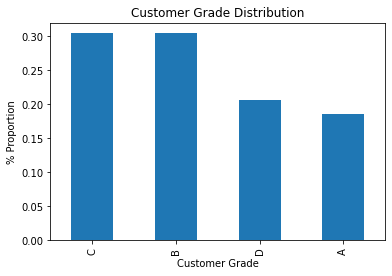

In [38]:
rfm_table['customer_grade'].value_counts(normalize=True).plot(kind='bar')
plt.title('Customer Grade Distribution')
plt.xlabel('Customer Grade')
plt.ylabel('% Proportion')
plt.show()

In [39]:
rfm_level_agg = rfm_table.groupby(['customer_grade']).agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value':['mean','count']}).round(1)

print(rfm_level_agg)

               recency frequency monetary_value      
                  mean      mean           mean count
customer_grade                                       
A                 60.2       6.3       226077.9    17
B                115.3       3.2       103177.5    28
C                205.8       2.6        79398.3    28
D                353.4       1.9        56693.8    19


RFM Analysis may leave some value on the table but it's a trade off for ease of use and understanding. It allows your marketing and sales staff actionable insights without having to rely on a more complex segmentation process that may turn into a black box for them.

# K-Means Segmentation


K-Means clustering is a method for customer segmentation rooted in machine learning. It can be used on a large variety of features, but for comparison we will be using it with just our RFM features to see how it stacks up.

KMeans assumptions that need to be checked for:
- All variables have symmetrical (Normal) Distribution
- All Variables have same average value(approx)
- All Variables have same variance(approx)

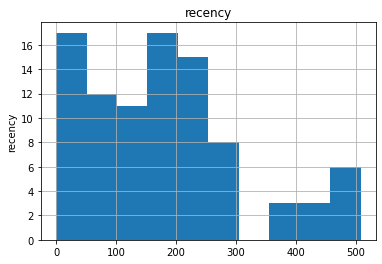

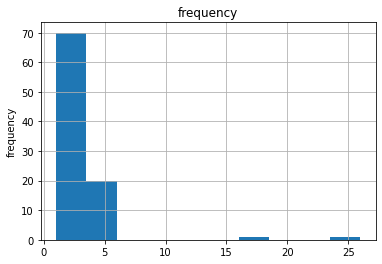

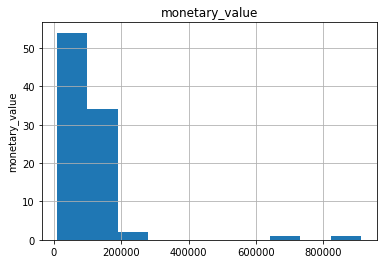

In [40]:
rfm = ['recency', 'frequency', 'monetary_value']

for feature in rfm:
  rfm_table[feature].hist()
  plt.title(feature)
  plt.ylabel(feature)
  plt.show()

In [41]:
log_rfm = np.log(rfm_table[rfm])
log_rfm['recency'] = log_rfm['recency'].replace(-np.inf, 0)
log_rfm.head()

,recency,frequency,monetary_value
CUSTOMERNAME,,,
"AV Stores, Co.",5.273000,1.098612,11.969133
Alpha Cognac,4.158883,1.098612,11.163204
Amica Models & Co.,5.575949,0.693147,11.452297
"Anna's Decorations, Ltd",4.418841,1.386294,11.944683
Atelier graphique,5.231109,1.098612,10.093279


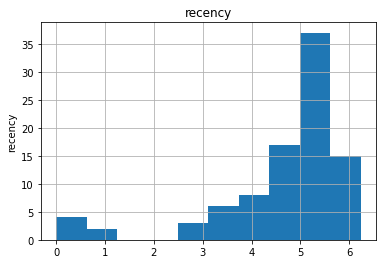

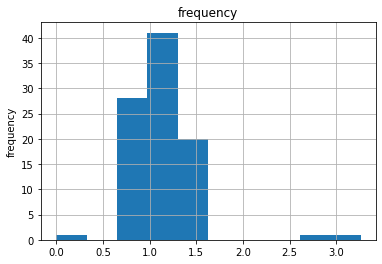

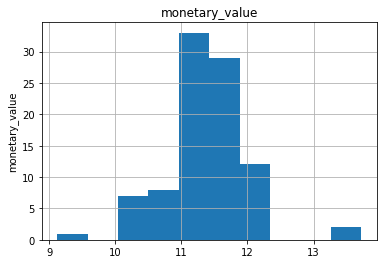

In [42]:
for feature in rfm:
  log_rfm[feature].hist()
  plt.title(feature)
  plt.ylabel(feature)
  plt.show()

In [43]:
scaler = StandardScaler()
scaler.fit(log_rfm)

rfm_normalized = scaler.transform(log_rfm)
rfm_normalized = pd.DataFrame(rfm_normalized, index=log_rfm.index, columns=log_rfm.columns)
rfm_normalized.describe().round()

,recency,frequency,monetary_value
count,92.0,92.0,92.0
mean,-0.0,0.0,0.0
std,1.0,1.0,1.0
min,-3.0,-3.0,-4.0
25%,-0.0,-1.0,-0.0
50%,0.0,0.0,-0.0
75%,1.0,0.0,1.0
max,1.0,5.0,4.0


Once assumptions are checked and corrected we need to decide how many clusters we will have. Based on the elbow plot, it looks like 4 or 5 is optimal. Again, for comparison, we will choose 4 clusters.

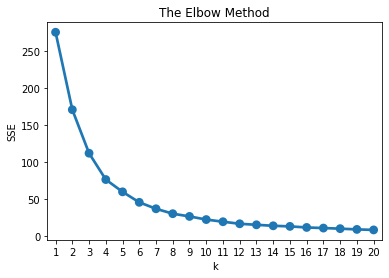

In [53]:
sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_ 

sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(rfm_normalized)
cluster_labels = kmeans.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
rfm_table = rfm_table.assign(Cluster=cluster_labels)
rfm_table.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_score,customer_grade,Cluster
CUSTOMERNAME,,,,,,,,,
"AV Stores, Co.",195,3,157807.81,3,3,1,7,B,1
Alpha Cognac,64,3,70488.44,1,3,3,7,B,1
Amica Models & Co.,264,2,94117.26,4,4,2,10,C,0
"Anna's Decorations, Ltd",83,4,153996.13,2,1,1,4,A,1
Atelier graphique,187,3,24179.96,3,3,4,10,C,0


In [46]:
grouped = rfm_table.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
  }).round(1)

recency frequency monetary_value      
           mean      mean           mean count
Cluster                                       
0         298.4       2.1        62728.6    33
1         131.9       3.4       109939.0    52
2           1.0      21.5       783576.1     2
3           3.6       3.8       135721.0     5

Comparing against the grades we assigned earlier we see similar clusters between the two but the K-means clusters are more narrowly defined.

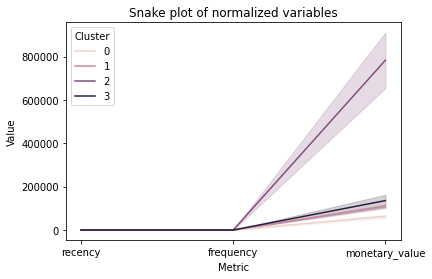

In [47]:
rfm_melt = pd.melt(rfm_table.reset_index(), id_vars=['CUSTOMERNAME', 'Cluster'],
                   value_vars=['recency', 'frequency', 'monetary_value'], 
                   var_name='Metric', value_name='Value')

sns.lineplot(data=rfm_melt, x='Metric', y='Value', hue='Cluster')
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

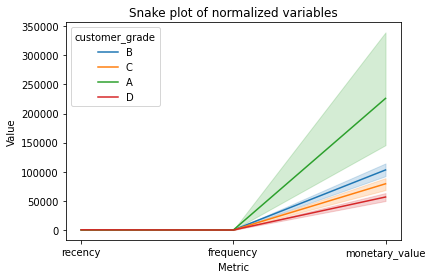

In [48]:
rfm_melt = pd.melt(rfm_table.reset_index(), id_vars=['CUSTOMERNAME', 'customer_grade'],
                   value_vars=['recency', 'frequency', 'monetary_value'], 
                   var_name='Metric', value_name='Value')

sns.lineplot(data=rfm_melt, x='Metric', y='Value', hue='customer_grade')
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

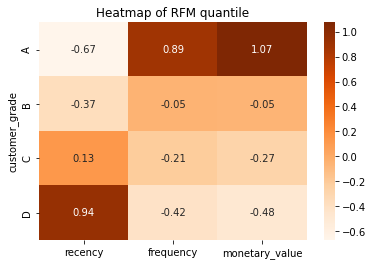

In [49]:
# the mean value in total 
total_avg = rfm_table.iloc[:, 0:3].mean()
cluster_avg = rfm_table.groupby('customer_grade').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1# heatmap with RFM
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.show()

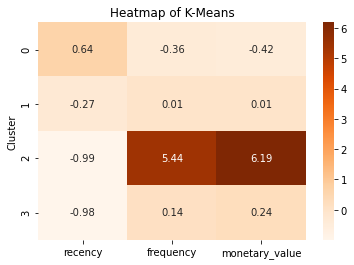

In [50]:
# calculate the proportional gap with total mean
cluster_avg_K = rfm_table.groupby('Cluster').mean().iloc[:, 0:3]
prop_rfm_K = cluster_avg_K/total_avg - 1# heatmap with K-means
sns.heatmap(prop_rfm_K, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.show()

In [51]:
rfm_table.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_score,customer_grade,Cluster
CUSTOMERNAME,,,,,,,,,
"AV Stores, Co.",195,3,157807.81,3,3,1,7,B,1
Alpha Cognac,64,3,70488.44,1,3,3,7,B,1
Amica Models & Co.,264,2,94117.26,4,4,2,10,C,0
"Anna's Decorations, Ltd",83,4,153996.13,2,1,1,4,A,1
Atelier graphique,187,3,24179.96,3,3,4,10,C,0


# Conclusions

There is beauty in simplicity. RFM's beauty is its ease of usability and interpratability. Once segmented, it is easy for anyone on the team to quickly and easily understand the segments of the customer base and take action. With more complex customer segmentation methods, we may get better granularity or use a wider range of features but lose some clarity in the understanding. 

No matter the segmentation method though, we see the value in grouping customers. It allows us to target each group with content specific to their needs. For some customers, we may simply need to make them feel appreciated for their loyalty. For others, we may need to offer incentives to visit more often and build up those habits that most benefit the company. And some, we may see as lost but still valuable and so we can add a personal touch and contact them directly to regain their business. Segmentation allows us to maximize sales and customer retention through personalized targeting.